In [21]:
from sklearn.datasets import load_wine
import numpy as np
import matplotlib.pyplot as plt

#Standardization of Data
#Center wine dataset
samples, labels = load_wine(return_X_y=True)
mean = np.mean(samples, axis = 0)
samples = np.asarray([sample - mean for sample in samples]).transpose()


In [22]:
#Compute PCA
numDims = 2
eigs, vecs = np.linalg.eig(samples @ samples.transpose())
PC = np.vstack(vecs[0:numDims])
features = PC @ samples

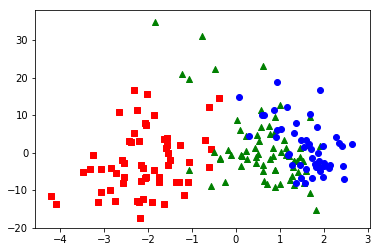

In [23]:
#Plot centered PCA features
zeros = features.transpose()[np.where(labels == 0)] 
ones = features.transpose()[np.where(labels == 1)] 
twos = features.transpose()[np.where(labels == 2)] 
plt.scatter(zeros[:,0], zeros[:,1], color = 'red', marker = "s")
plt.scatter(ones[:,0], ones[:,1], color = 'green', marker = "^")
plt.scatter(twos[:,0], twos[:,1], color = 'blue', marker = "o")
plt.show()

In [24]:
#Normalize wine dataset & calculate PCA
std_dev = np.std(samples,axis=1)

for i in range(len((samples.transpose()))):
    samples.transpose()[i] = np.divide(samples.transpose()[i],std_dev)    

[8.09542915e-01 1.11400363e+00 2.73572294e-01 3.33016976e+00
 1.42423077e+01 6.24090564e-01 9.96048950e-01 1.24103260e-01
 5.70748849e-01 2.31176466e+00 2.27928607e-01 7.07993265e-01
 3.14021657e+02]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [25]:
eigs_n, vecs_n = np.linalg.eig(samples @ samples.transpose())
PC_n = np.vstack(vecs_n[0:numDims])
features_n = PC_n @ samples

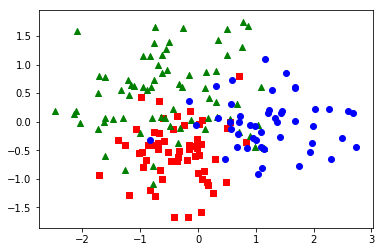

In [27]:
zeros_n = features_n.transpose()[np.where(labels == 0)] 
ones_n = features_n.transpose()[np.where(labels == 1)] 
twos_n = features_n.transpose()[np.where(labels == 2)] 
plt.scatter(zeros_n[:,0], zeros_n[:,1], color = 'red', marker = "s")
plt.scatter(ones_n[:,0], ones_n[:,1], color = 'green', marker = "^")
plt.scatter(twos_n[:,0], twos_n[:,1], color = 'blue', marker = "o")
plt.show()

In [28]:
#There is more overlap between the classes, so the PCA features of only
#the mean-centered data would lead to better classification performance

In [ ]:
#Naive Bayes Classification
